#### **Research Paper Link/Reference Link**
- <a href="file:///C:/Users/prash/OneDrive/Desktop/CHE506_Reaction_Engineering_Laboratory_C.pdf" target="_blank">CHE506 Reaction Engineering Laboratory</a>
- [CHE506 Reaction Engineering Laboratory](https://www.isca.in/rjcs/Archives/v5/i11/3.ISCA-RJCS-2015-137.pdf)

- [IJERA Research Paper](https://www.ijera.com/papers/Vol5_issue2/Part%20-%202/K502027478.pdf)

##### **Research Paper Link for k0 and Ea Values**
- [IRJET Research Paper](https://www.irjet.net/archives/V6/i3/IRJET-V6I31210.pdf?utm_source=chatgpt.com)

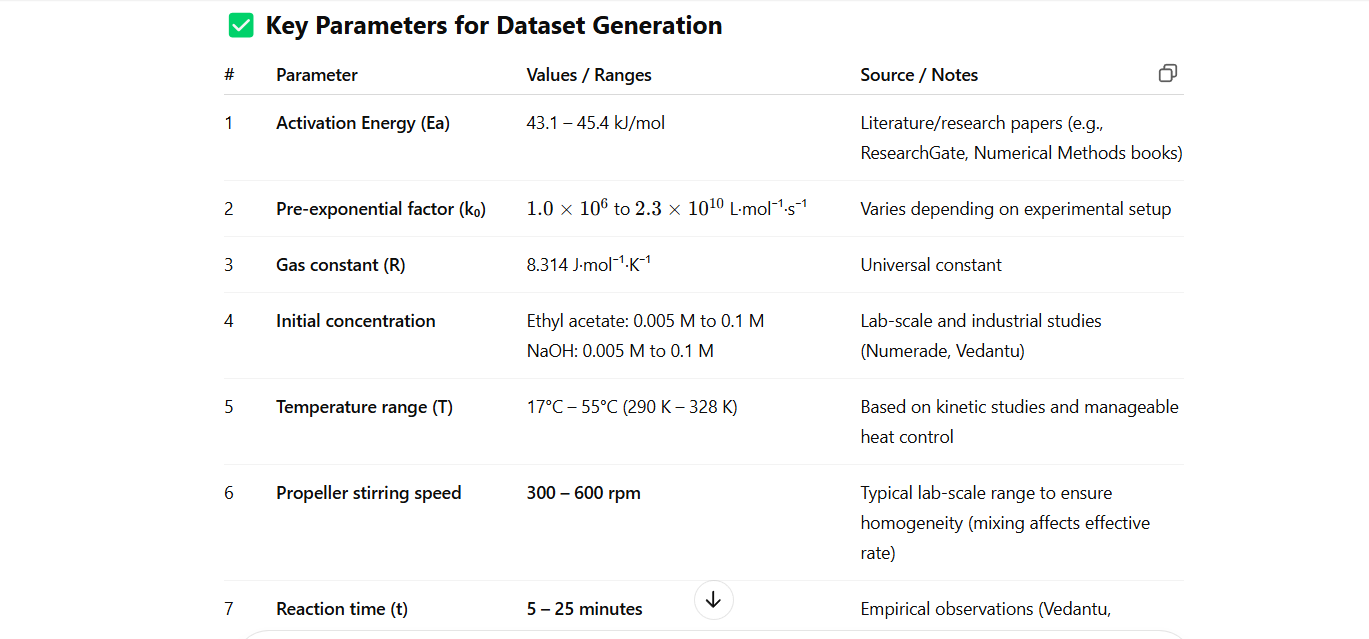

# Batch Reactor Analysis

### Reaction:
**CH₃COOC₂H₅ + NaOH → CH₃COONa + C₂H₅OH**

---

### Initial Concentrations:
- **Cₐ₀**: Initial concentration of Ethyl Acetate  
- **Cᵦ₀**: Initial concentration of NaOH  

Let:
- **M = Cᵦ₀ / Cₐ₀**  
- **k = k₀ * e^(-Ea / RT)**  

Where:
- **Ea = 29775 J/mol**  
- **R = 8.314 J/mol·K**  
- **k₀ = 27038 L/mol·s**

---

### Rate Equation:
**-rₐ = k * Cₐ * Cᵦ**

For a batch reactor:
- **Cₐ = Cₐ₀ (1 - Xₐ)**  
- **Cᵦ =  (Cᵦ₀ - Cₐ₀*Xₐ) =  Cₐ₀ (M - Xₐ)**  

More accurately (accounting for different M):
**-rₐ = k * Cₐ₀² * (1 - Xₐ) * (M - Xₐ)**

---

### Batch Reactor Mole Balance:
**dXₐ / dt = k * Cₐ₀ * (1 - Xₐ) * (M - Xₐ)**

---

### Separate Variables and Integrate:
**∫₀ˣₐ [1 / ((1 - Xₐ)(M - Xₐ))] dXₐ = k * Cₐ₀ ∫₀ᵗ dt**

**1 / ((1 - Xₐ)(M - Xₐ)) = 1 / M [1 / (1 - Xₐ) - 1 / (M - Xₐ)]**

**∫₀ˣₐ [1 / (1 - Xₐ) - 1 / (M - Xₐ)] dXₐ = (M - 1) * k * Cₐ₀ * t**

**ln((M - Xₐ) / M(1 - Xₐ)) = (M - 1) * k * Cₐ₀ * t**

---

### Solving for Conversion (Xₐ):
Let:
**const_value = e^((M - 1) * k * Cₐ₀ * t)**

**(M - Xₐ) / (1 - Xₐ) = const_value**

**M - Xₐ = const_value * (1 - Xₐ)**  

**M - Xₐ = const_value - const_value * Xₐ**

**Xₐ * (const_value - 1) = M - const_value**

**Xₐ = (M - const_value) / (const_value - 1)**  

**Xₐ = M * [(e^((M - 1) * k * Cₐ₀ * t) - 1) / (M * e^((M - 1) * k * Cₐ₀ * t) - 1)]**

---

Let me know if you want this formula implemented in Python or further clarified!

In [4]:
import numpy as np
np.random.seed(42)  # For reproducibility
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import statsmodels.stats.proportion as ssp  
import statsmodels.stats.multitest as smm
import statsmodels.stats.diagnostic as smd  
Ea = 29775 #J/mol
k0 = 27038      #L·mol⁻¹·s⁻¹
R=8.314
n=1000 # number of samples
# Sample data generation
sample = {
    "initial_concentration": {
        "ethyl_acetate": np.round(np.random.uniform(0.01, 0.1, n), 3),  # Ethyl acetate concentration in mol/L
        "NaOH": np.round(np.random.uniform(0.01, 0.1, n), 3)
    },
    "temperature": np.round(np.random.uniform(295, 330, n), 2), # Temperature in Kelvin (22°C to 57°C)
   
    "time":np.round(np.random.uniform(300, 1800, n), 2) # time in randge from 5 to 30 minutes to vary conversion from 0.1 to 0.99
}

M=np.round((sample["initial_concentration"]["NaOH"]/sample["initial_concentration"]["ethyl_acetate"]),2)


def calculate_k():
    temps = np.array(sample["temperature"])
    k_vals = k0 * np.exp(-Ea/ (R * temps))
    return k_vals


k_values = calculate_k()

print("k values:")
k_values

k values:


array([0.20816487, 0.2040094 , 0.46935235, 0.20472364, 0.2110827 ,
       0.39392137, 0.26710901, 0.40217655, 0.15857667, 0.28045338,
       0.15157662, 0.15793518, 0.46950983, 0.17589428, 0.29703707,
       0.25400856, 0.23353454, 0.46574201, 0.14899611, 0.35034436,
       0.50172149, 0.30779268, 0.48645037, 0.15564373, 0.25658521,
       0.20776227, 0.38047193, 0.5122871 , 0.20671856, 0.34627539,
       0.19082688, 0.30980267, 0.27210055, 0.50673032, 0.32709409,
       0.23415575, 0.16981887, 0.17885707, 0.19813744, 0.20512134,
       0.43945652, 0.30812693, 0.29370006, 0.17002307, 0.44440317,
       0.37677442, 0.15909142, 0.36985632, 0.3012796 , 0.16227477,
       0.27009477, 0.27942355, 0.18251048, 0.49149796, 0.43915818,
       0.35270489, 0.27149753, 0.25419869, 0.34480543, 0.30204634,
       0.15787116, 0.28965179, 0.41682139, 0.27039485, 0.15558048,
       0.4069171 , 0.19172825, 0.20728002, 0.18222171, 0.22826566,
       0.39269518, 0.29220319, 0.19263315, 0.45382013, 0.45489

#### **conversion(X_A) calcultion**
- **finding coversion calculation using reactor kinetic equation**

In [5]:
def conversion_of_A():
    ethyl_acetate_conc = sample["initial_concentration"]['ethyl_acetate']
    time = sample["time"]
    
    # Case where M != 1
    exp_term = np.exp(k_values * time * ethyl_acetate_conc * (M - 1))
    numerator = M * (exp_term - 1)
    denominator = M * exp_term - 1
    
    # Avoid division by zero or invalid values in the denominator
    result = np.divide(numerator, denominator, out=np.zeros_like(numerator), where=denominator != 0)
    
    # Case where M == 1
    mask = (M == 1)
    result[mask] = (k_values[mask] * ethyl_acetate_conc[mask] * time[mask]) / (
        1 + k_values[mask] * ethyl_acetate_conc[mask] * time[mask]
    )
    
    return np.round(result, 4)

X_A = conversion_of_A()
X_A  # Print the first 10 conversion values

array([0.6078, 0.61  , 0.9976, 0.9924, 1.    , 1.    , 1.    , 0.9081,
       0.4997, 0.704 , 0.9715, 0.9276, 0.9971, 0.4508, 1.    , 1.    ,
       0.6943, 0.9853, 0.9633, 0.36  , 0.9935, 0.9936, 1.    , 0.9993,
       0.9939, 0.6486, 1.    , 1.    , 0.6196, 1.    , 0.1996, 1.    ,
       0.9986, 0.22  , 0.18  , 0.8561, 0.9033, 1.    , 0.218 , 0.7464,
       1.    , 1.    , 0.9814, 0.7161, 1.    , 0.9242, 0.7441, 0.21  ,
       0.9999, 0.3915, 0.8923, 0.7197, 0.9242, 0.8965, 1.    , 0.45  ,
       1.    , 0.9352, 0.9972, 1.    , 0.9972, 0.9998, 0.9265, 0.9804,
       0.978 , 0.9983, 0.7134, 0.24  , 0.9721, 0.36  , 0.46  , 0.9524,
       0.739 , 0.14  , 1.    , 0.63  , 0.57  , 0.999 , 0.7025, 1.    ,
       0.8989, 0.27  , 0.9423, 1.    , 1.    , 0.998 , 0.8316, 0.368 ,
       0.999 , 0.5922, 1.    , 0.9196, 0.8144, 0.9113, 0.3894, 0.48  ,
       0.53  , 0.55  , 0.9999, 0.9971, 0.7933, 1.    , 1.    , 1.    ,
       0.9913, 0.756 , 0.9555, 0.9199, 1.    , 0.9963, 1.    , 0.8421,
      

#### **converting all features into dataframe:-**

In [6]:


# Create a DataFrame with the required features
data = {
    "Ethyl_acetate(Ca0)": sample["initial_concentration"]["ethyl_acetate"],
    "NaOH(Cb0)": sample["initial_concentration"]["NaOH"],
    "Temperature(T(°C))": sample["temperature"] - 273.15,  # Convert Kelvin to Celsius
    "Time_of_reaction(min)": sample["time"] / 60,  # Convert seconds to minutes
    "Conversion(X_A)": X_A
}

df = pd.DataFrame(data)

# Save the DataFrame to a CSV file
df.to_csv("reaction_data.csv", index=False)

print("Dataset created and saved as 'reaction_data.csv'")
df


Dataset created and saved as 'reaction_data.csv'


,Ethyl_acetate(Ca0),NaOH(Cb0),Temperature(T(°C)),Time_of_reaction(min),Conversion(X_A)
0,0.044,0.027,31.01,21.817500,0.6078
1,0.096,0.059,30.49,24.917000,0.6100
2,0.076,0.089,53.57,11.261667,0.9976
3,0.064,0.076,30.58,20.621833,0.9924
4,0.024,0.083,31.37,19.293667,1.0000
...,...,...,...,...,...
995,0.018,0.069,52.14,16.052667,1.0000
996,0.093,0.096,27.35,13.360000,0.9446
997,0.022,0.016,32.69,14.864333,0.6516
998,0.096,0.015,32.00,18.248500,0.1600


#### **Data cleaning**
- searching for missing value or zeros

In [7]:
import seaborn as sns
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt

# Check for missing values
print("Missing values in the dataset:")
df.isnull().sum()

Missing values in the dataset:


Ethyl_acetate(Ca0)       0
NaOH(Cb0)                0
Temperature(T(°C))       0
Time_of_reaction(min)    0
Conversion(X_A)          0
dtype: int64

#### **Statistical summary:-**
- it tells about data distrubtion 
- helps in identification of data quality issue
- gives ideal about feature selection

In [8]:
# Statistical summary of the dataset
print("\nStatistical summary:")
df.describe()



Statistical summary:


,Ethyl_acetate(Ca0),NaOH(Cb0),Temperature(T(°C)),Time_of_reaction(min),Conversion(X_A)
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.054135,0.055643,39.434110,17.259377,0.782197
std,0.026307,0.026299,10.173723,7.162233,0.260564
min,0.010000,0.010000,21.850000,5.016333,0.120000
25%,0.031000,0.032000,30.997500,11.047500,0.610000
50%,0.055000,0.057000,39.370000,17.107000,0.915050
75%,0.077000,0.078000,48.422500,23.438542,0.999700
max,0.100000,0.100000,56.770000,29.989000,1.000000


#####   **Pairplot to visualize relationships between features**

In [9]:
# Correlation matrix to understand relationships between features
correlation_matrix = df.corr()
print("\nCorrelation matrix:")
correlation_matrix


Correlation matrix:


,Ethyl_acetate(Ca0),NaOH(Cb0),Temperature(T(°C)),Time_of_reaction(min),Conversion(X_A)
Ethyl_acetate(Ca0),1.000000,0.029547,0.014401,-0.029581,-0.460076
NaOH(Cb0),0.029547,1.000000,0.026788,-0.005971,0.753422
Temperature(T(°C)),0.014401,0.026788,1.000000,-0.013562,0.059669
Time_of_reaction(min),-0.029581,-0.005971,-0.013562,1.000000,0.045672
Conversion(X_A),-0.460076,0.753422,0.059669,0.045672,1.000000


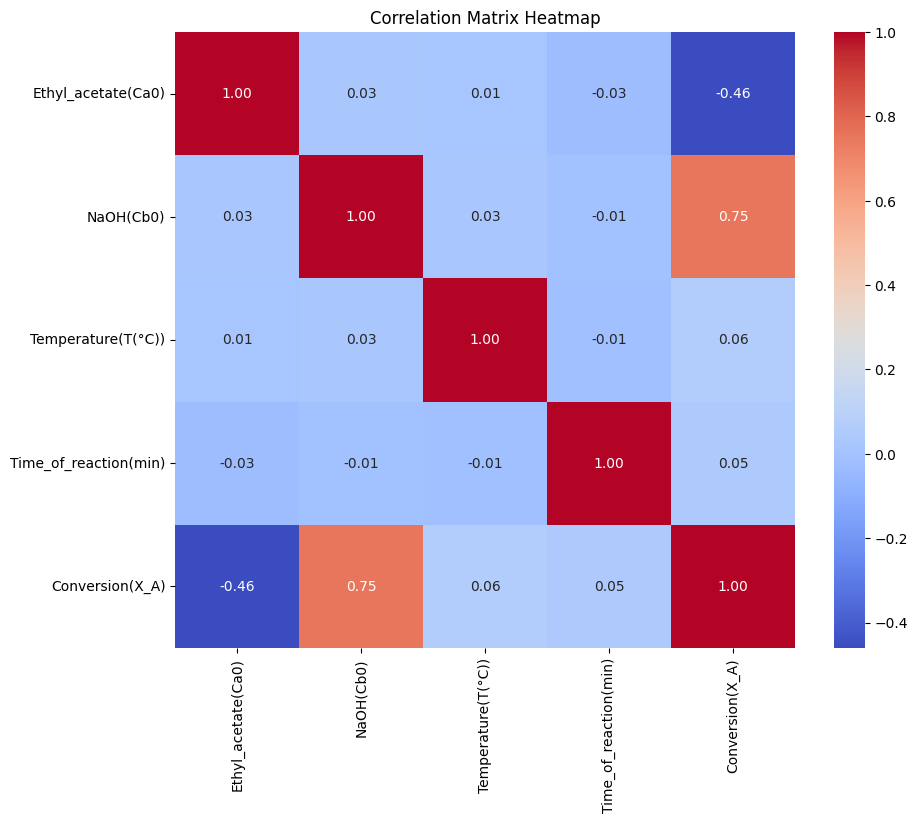

In [10]:
# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()




c:\Users\prash\OneDrive\Desktop\fyp_2025\.venv\Lib\site-packages\seaborn\axisgrid.py:1513: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=vector, **plot_kwargs)
c:\Users\prash\OneDrive\Desktop\fyp_2025\.venv\Lib\site-packages\seaborn\axisgrid.py:1513: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=vector, **plot_kwargs)
c:\Users\prash\OneDrive\Desktop\fyp_2025\.venv\Lib\site-packages\seaborn\axisgrid.py:1513: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=vector, **plot_kwargs)
c:\Users\prash\OneDrive\Desktop\fyp_2025\.venv\Lib\site-packages\seaborn\axisgrid.py:1513: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `

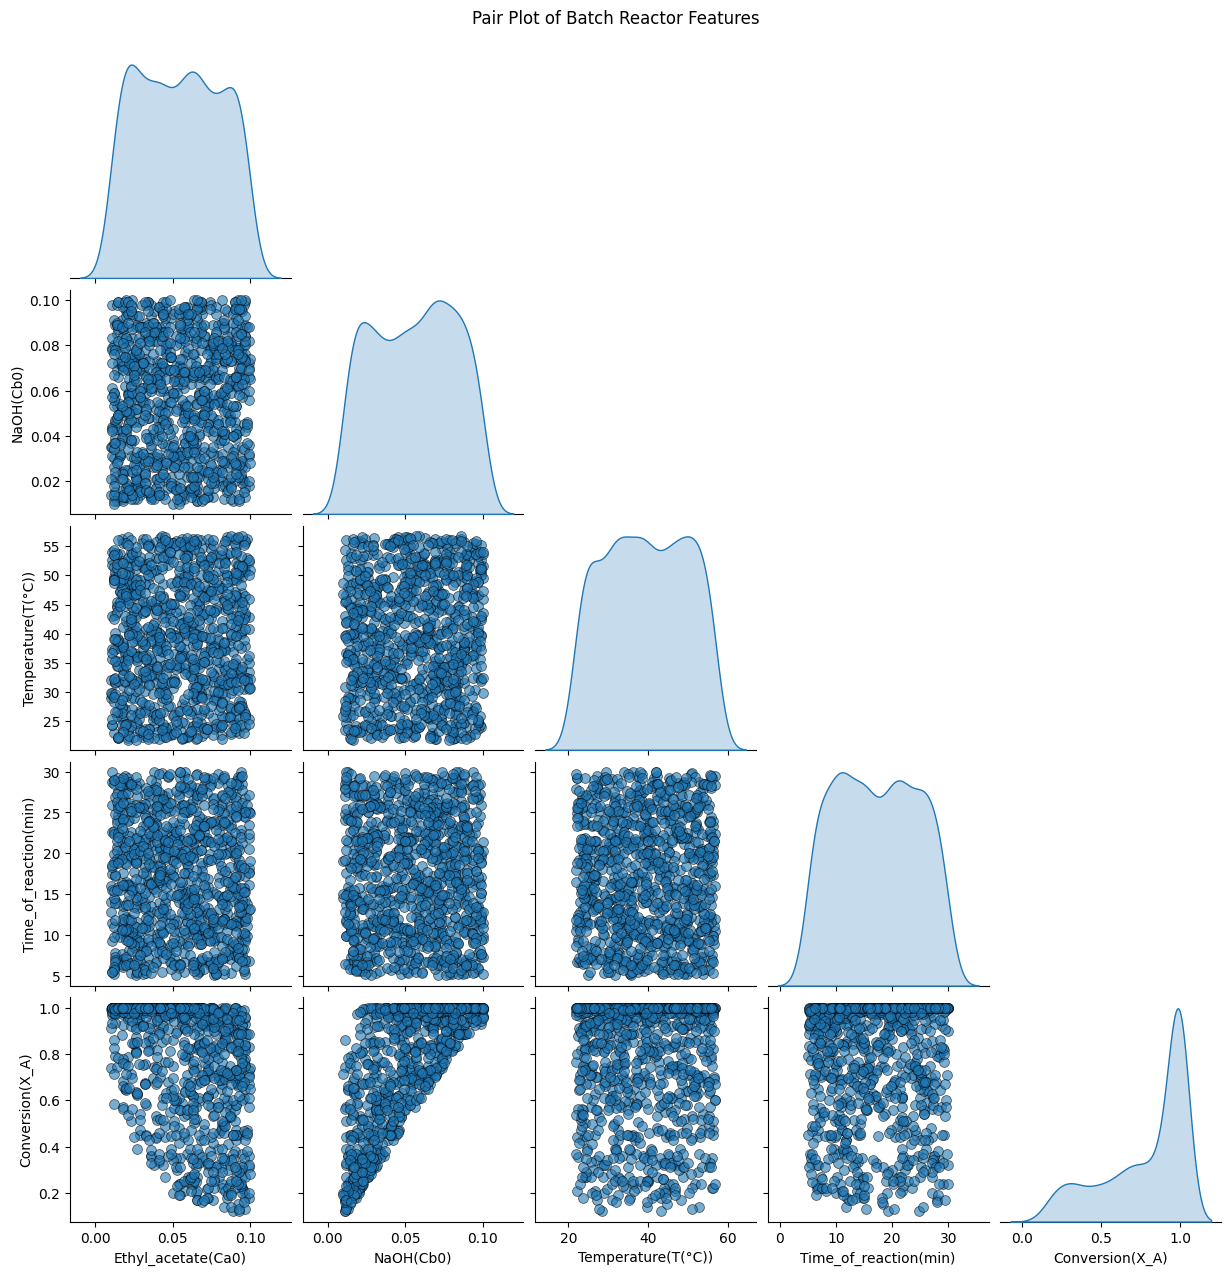

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pair plot to visualize relationships between features
sns.pairplot(df, diag_kind='kde', corner=True, 
             plot_kws={'alpha': 0.6, 's': 50, 'edgecolor': 'k'}, 
             diag_kws={'shade': True})

plt.suptitle("Pair Plot of Batch Reactor Features", y=1.02)
plt.show()

### **Scaling of data set**

**Purpose of Scaling**
- Equal Contribution of Features:
- **Faster Convergence**:Optimization algorithms (e.g., gradient descent) converge faster when features are scaled.
- Improved Model Performance


**Advantages of Scaling a Dataset**
- **Prevents Bias in the Model**: Features with larger magnitudes can dominate the model's learning process, leading to biased results. Scaling eliminates this issue.
- Improves Numerical Stability
- Facilitates Faster Training


In [12]:



scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.drop(columns=["Conversion(X_A)"]))
scaled_df = pd.DataFrame(scaled_features, columns=df.columns[:-1])
scaled_df["Conversion(X_A)"] = df["Conversion(X_A)"]

print("\nScaled dataset preview:")
scaled_df.head()


Scaled dataset preview:


,Ethyl_acetate(Ca0),NaOH(Cb0),Temperature(T(°C)),Time_of_reaction(min),Conversion(X_A)
0,-0.385451,-1.089660,-0.828441,0.636729,0.6078
1,1.592197,0.127710,-0.879578,1.069702,0.6100
2,0.831563,1.268994,1.390146,-0.837827,0.9976
3,0.375183,0.774437,-0.870727,0.469705,0.9924
4,-1.146085,1.040737,-0.793038,0.284172,1.0000


#### **split,train,test and finding error:-**

In [13]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Split the data into features and target
X = scaled_df.drop(columns=["Conversion(X_A)"])
y = scaled_df["Conversion(X_A)"]

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 0.0006121107122149998
R-squared: 0.9912286018394255


### **features that effect more random forest**

In [14]:
feature_importances = rf_model.feature_importances_
importance_df = pd.DataFrame({
    "Feature": X.columns,
    "Importance": feature_importances
}).sort_values(by="Importance", ascending=False)

print("\nFeature Importances:")
importance_df


Feature Importances:


,Feature,Importance
1,NaOH(Cb0),0.685855
0,Ethyl_acetate(Ca0),0.302422
3,Time_of_reaction(min),0.005988
2,Temperature(T(°C)),0.005735


C:\Users\prash\AppData\Local\Temp\ipykernel_7588\1038871999.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=importance_df, palette="viridis")


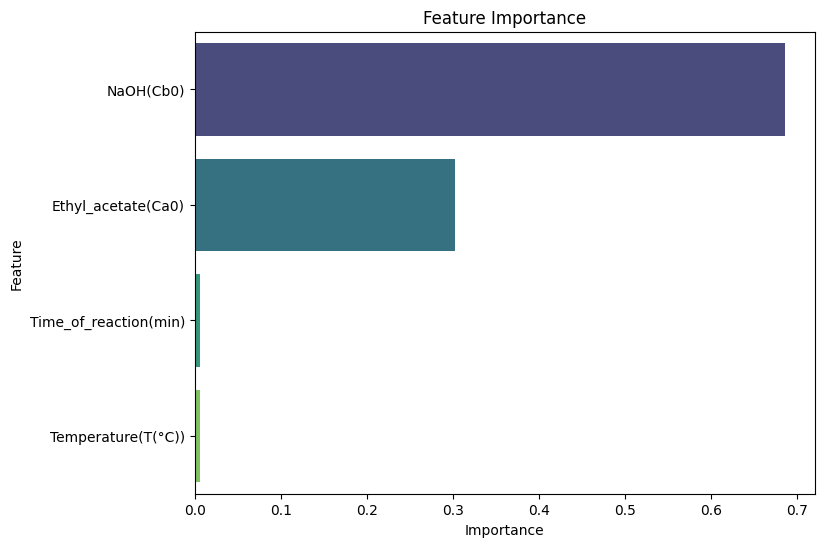

In [15]:
# Plot feature importance
plt.figure(figsize=(8, 6))
sns.barplot(x="Importance", y="Feature", data=importance_df, palette="viridis")
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

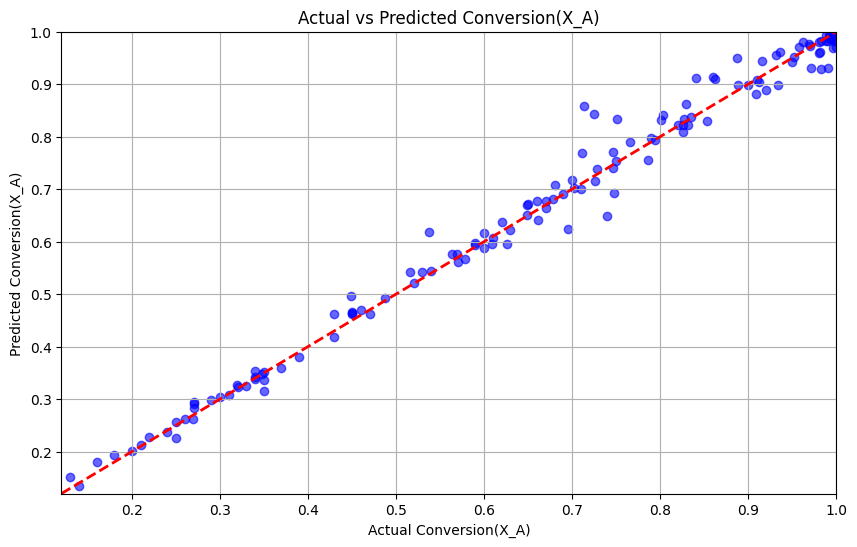

In [16]:
# Plotting actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.title("Actual vs Predicted Conversion(X_A)")
plt.xlabel("Actual Conversion(X_A)")
plt.ylabel("Predicted Conversion(X_A)")
plt.xlim(y.min(), y.max())
plt.ylim(y.min(), y.max())
plt.grid()
plt.show()
# Residuals plot




#### **Improvement of random forest model with different parameter**

In [17]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Perform Grid Search
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Get the best parameters and best model
best_rf_model = grid_search.best_estimator_
print("Best Parameters for Random Forest:", grid_search.best_params_)

# Evaluate the improved model
y_pred_improved = best_rf_model.predict(X_test)
mse_improved = mean_squared_error(y_test, y_pred_improved)
r2_improved = r2_score(y_test, y_pred_improved)
print(f"Improved Random Forest - Mean Squared Error: {mse_improved}")
print(f"Improved Random Forest - R-squared: {r2_improved}")

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Parameters for Random Forest: {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Improved Random Forest - Mean Squared Error: 0.0006753436182238865
Improved Random Forest - R-squared: 0.9903224896208579


#### **train,testing and finding of error using GradientBoostingRegressor**

In [18]:
from sklearn.ensemble import GradientBoostingRegressor

# Train a Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(random_state=42, n_estimators=100, learning_rate=0.1, max_depth=3)
gb_model.fit(X_train, y_train)

# Predict on the test set
y_pred_gb = gb_model.predict(X_test)

# Evaluate the Gradient Boosting model
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print(f"Gradient Boosting - Mean Squared Error: {mse_gb}")
print(f"Gradient Boosting - R-squared: {r2_gb}")

# Compare models
print("\nModel Comparison:")
print(f"Random Forest - MSE: {mse}, R2: {r2}")
print(f"Gradient Boosting - MSE: {mse_gb}, R2: {r2_gb}")

if r2_gb > r2:
    print("Gradient Boosting performs better for this reactor performance optimization.")
else:
    print("Random Forest performs better for this reactor performance optimization.")

Gradient Boosting - Mean Squared Error: 0.001069409159794631
Gradient Boosting - R-squared: 0.9846756259122134

Model Comparison:
Random Forest - MSE: 0.0006121107122149998, R2: 0.9912286018394255
Gradient Boosting - MSE: 0.001069409159794631, R2: 0.9846756259122134
Random Forest performs better for this reactor performance optimization.


#### **improvemet of gradientboosting regessor with different parameter**

In [19]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Gradient Boosting Regressor
param_grid_gb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform Grid Search
grid_search_gb = GridSearchCV(estimator=gb_model, param_grid=param_grid_gb, cv=5, scoring='r2', n_jobs=-1, verbose=2)
grid_search_gb.fit(X_train, y_train)

# Get the best parameters and best model
best_gb_model = grid_search_gb.best_estimator_
print("Best Parameters for Gradient Boosting:", grid_search_gb.best_params_)

# Evaluate the improved model
y_pred_gb_improved = best_gb_model.predict(X_test)
mse_gb_improved = mean_squared_error(y_test, y_pred_gb_improved)
r2_gb_improved = r2_score(y_test, y_pred_gb_improved)
print(f"Improved Gradient Boosting - Mean Squared Error: {mse_gb_improved}")
print(f"Improved Gradient Boosting - R-squared: {r2_gb_improved}")

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best Parameters for Gradient Boosting: {'learning_rate': 0.1, 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 300}
Improved Gradient Boosting - Mean Squared Error: 0.0007868999128258873
Improved Gradient Boosting - R-squared: 0.9887239149549586


#### **liner regrssor and svr model for train,test and finding error of data set**

In [20]:
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Train a Support Vector Regressor (SVR)
svr_model = SVR(kernel='rbf', C=1.0, epsilon=0.1)
svr_model.fit(X_train, y_train)

# Predict on the test set using SVR
y_pred_svr = svr_model.predict(X_test)

# Evaluate the SVR model
mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)
print(f"SVR - Mean Squared Error: {mse_svr}")
print(f"SVR - R-squared: {r2_svr}")

# Train a Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predict on the test set using Linear Regression
y_pred_lr = lr_model.predict(X_test)

# Evaluate the Linear Regression model
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
print(f"Linear Regression - Mean Squared Error: {mse_lr}")
print(f"Linear Regression - R-squared: {r2_lr}")

# Compare all models
print("\nModel Comparison:")
print(f"Random Forest - MSE: {mse}, R2: {r2}")
print(f"Gradient Boosting - MSE: {mse_gb}, R2: {r2_gb}")
print(f"SVR - MSE: {mse_svr}, R2: {r2_svr}")
print(f"Linear Regression - MSE: {mse_lr}, R2: {r2_lr}")

SVR - Mean Squared Error: 0.0031175745894189404
SVR - R-squared: 0.9553259116800455
Linear Regression - Mean Squared Error: 0.011739856495470371
Linear Regression - R-squared: 0.8317707015824807

Model Comparison:
Random Forest - MSE: 0.0006121107122149998, R2: 0.9912286018394255
Gradient Boosting - MSE: 0.001069409159794631, R2: 0.9846756259122134
SVR - MSE: 0.0031175745894189404, R2: 0.9553259116800455
Linear Regression - MSE: 0.011739856495470371, R2: 0.8317707015824807


#### **XGBRegressor train,test and error evalution**


In [32]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Train an XGBoost Regressor
xgb_model = XGBRegressor(random_state=42, n_estimators=300, learning_rate=0.1, max_depth=5)
xgb_model.fit(X_train, y_train)

# Predict on the test set
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the XGBoost model
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"XGBoost - Mean Squared Error: {mse_xgb}")
print(f"XGBoost - R-squared: {r2_xgb}")

# Compare with other models
print("\nModel Comparison:")
print(f"Random Forest - MSE: {mse}, R2: {r2}")
print(f"Gradient Boosting - MSE: {mse_gb}, R2: {r2_gb}")
print(f"XGBoost - MSE: {mse_xgb}, R2: {r2_xgb}")


# ...existing code...

# Display MSE and R² for all trained models in Batch Reactor analysis

print("Model Performance Comparison (Batch Reactor):")
print(f"Random Forest      - MSE: {mse}, R²: {r2}")
print(f"Improved RF        - MSE: {mse_improved}, R²: {r2_improved}")
print(f"Gradient Boosting  - MSE: {mse_gb}, R²: {r2_gb:.4f}")
print(f"Improved GB        - MSE: {mse_gb_improved:.4f}, R²: {r2_gb_improved}")
print(f"SVR                - MSE: {mse_svr}, R²: {r2_svr}")
print(f"Linear Regression  - MSE: {mse_lr}, R²: {r2_lr}")
print(f"XGBoost            - MSE: {mse_xgb}, R²: {r2_xgb}")
print(f"CatBoost           - MSE: {mse_catboost}, R²: {r2_catboost}")
print(f"Neural Network     - MSE: {mse_nn}, R²: {r2_nn}")

# ...existing code...

XGBoost - Mean Squared Error: 0.0007523093452424591
XGBoost - R-squared: 0.9892195894053805

Model Comparison:
Random Forest - MSE: 0.0006121107122149998, R2: 0.9912286018394255
Gradient Boosting - MSE: 0.001069409159794631, R2: 0.9846756259122134
XGBoost - MSE: 0.0007523093452424591, R2: 0.9892195894053805
Model Performance Comparison (Batch Reactor):
Random Forest      - MSE: 0.0006121107122149998, R²: 0.9912286018394255
Improved RF        - MSE: 0.0006753436182238865, R²: 0.9903224896208579
Gradient Boosting  - MSE: 0.001069409159794631, R²: 0.9847
Improved GB        - MSE: 0.0008, R²: 0.9887239149549586
SVR                - MSE: 0.0031175745894189404, R²: 0.9553259116800455
Linear Regression  - MSE: 0.011739856495470371, R²: 0.8317707015824807
XGBoost            - MSE: 0.0007523093452424591, R²: 0.9892195894053805
CatBoost           - MSE: 0.00035688913374008605, R²: 0.99488586520584
Neural Network     - MSE: 0.000726636994987491, R²: 0.9895874679628218


#### **improvement of XGBRegressor with different parameter** 

In [30]:
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Train a CatBoost Regressor
catboost_model = CatBoostRegressor(iterations=500, learning_rate=0.1, depth=6, random_state=42, verbose=0)
catboost_model.fit(X_train, y_train)

# Predict on the test set
y_pred_catboost = catboost_model.predict(X_test)

# Evaluate the CatBoost model
mse_catboost = mean_squared_error(y_test, y_pred_catboost)
r2_catboost = r2_score(y_test, y_pred_catboost)

print(f"CatBoost - Mean Squared Error: {mse_catboost}")
print(f"CatBoost - R-squared: {r2_catboost}")

CatBoost - Mean Squared Error: 0.00035688913374008605
CatBoost - R-squared: 0.99488586520584


### **use neweral network for data set testing**

In [23]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import mean_squared_error, r2_score

# Define the neural network model
def create_model():
    model = Sequential([
        Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
        Dropout(0.2),
        Dense(32, activation='relu'),
        Dropout(0.2),
        Dense(1, activation='linear')  # Output layer for regression
    ])
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model

# Create the model
nn_model = create_model()

# Train the model
history = nn_model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=32, verbose=1)

# Predict on the test set
y_pred_nn = nn_model.predict(X_test).flatten()

# Evaluate the model
mse_nn = mean_squared_error(y_test, y_pred_nn)
r2_nn = r2_score(y_test, y_pred_nn)

print(f"Neural Network - Mean Squared Error: {mse_nn}")
print(f"Neural Network - R-squared: {r2_nn}")

Epoch 1/100


c:\Users\prash\OneDrive\Desktop\fyp_2025\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.5491 - mae: 0.6294 - val_loss: 0.1085 - val_mae: 0.2795
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1673 - mae: 0.3243 - val_loss: 0.0564 - val_mae: 0.1943
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1318 - mae: 0.2941 - val_loss: 0.0486 - val_mae: 0.1790
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1045 - mae: 0.2605 - val_loss: 0.0403 - val_mae: 0.1651
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0927 - mae: 0.2521 - val_loss: 0.0371 - val_mae: 0.1599
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0933 - mae: 0.2454 - val_loss: 0.0339 - val_mae: 0.1503
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0811 - mae: 0.2343 - val_loss: 0.0304 - val_mae: 0.1431
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0700 - mae: 0.2122 - val_loss: 0.0300 - val_mae: 0.1419
Epoch 9/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0726 - mae: 0.

#### **Error plotting with different model**

C:\Users\prash\AppData\Local\Temp\ipykernel_7588\465303320.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="MSE", y="Model", data=model_comparison, palette="viridis")
C:\Users\prash\AppData\Local\Temp\ipykernel_7588\465303320.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="R²", y="Model", data=model_comparison, palette="viridis")


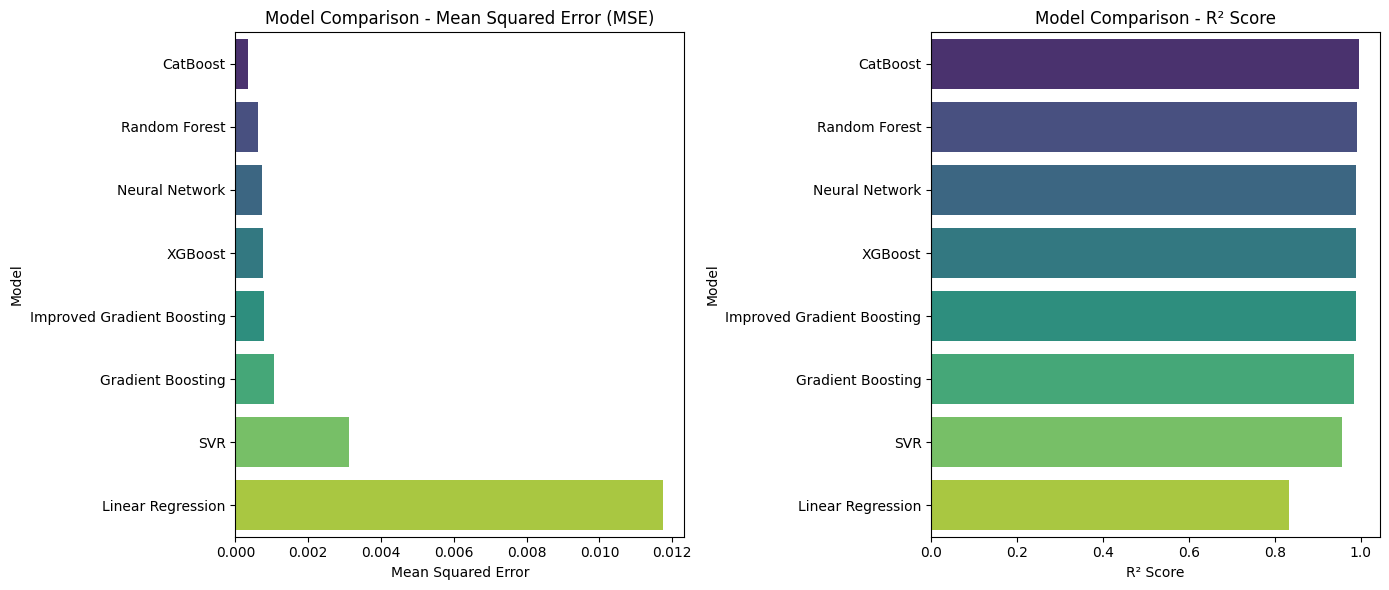

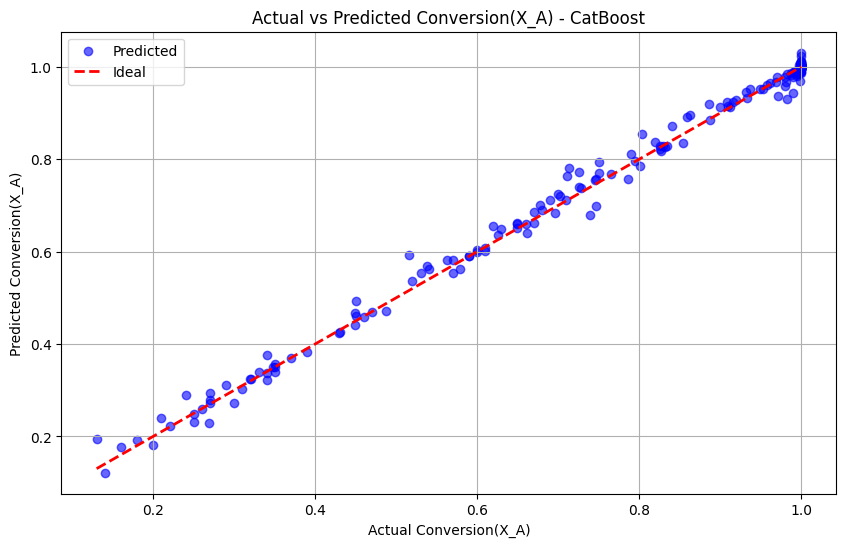

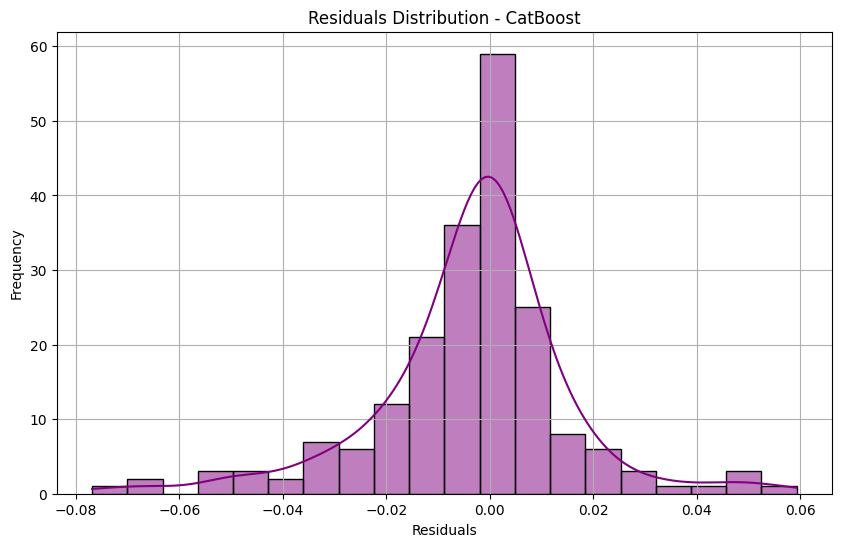

The best model is CatBoost with R² = 0.9949 and MSE = 0.0004.


In [24]:
import seaborn as sns
import pandas as pd

# Import necessary libraries
import matplotlib.pyplot as plt

# Create a DataFrame to store model performance metrics
model_comparison = pd.DataFrame({
    "Model": [
        "Random Forest", "Gradient Boosting", "Improved Gradient Boosting",
        "CatBoost", "XGBoost", "SVR", "Linear Regression", "Neural Network"
    ],
    "MSE": [
        mse, mse_gb, mse_gb_improved, mse_catboost, mse_xgb, mse_svr, mse_lr, mse_nn
    ],
    "R²": [
        r2, r2_gb, r2_gb_improved, r2_catboost, r2_xgb, r2_svr, r2_lr, r2_nn
    ]
})

# Sort by R² for better visualization
model_comparison = model_comparison.sort_values(by="R²", ascending=False)

# Plot MSE and R² for all models
plt.figure(figsize=(14, 6))

# MSE Bar Plot
plt.subplot(1, 2, 1)
sns.barplot(x="MSE", y="Model", data=model_comparison, palette="viridis")
plt.title("Model Comparison - Mean Squared Error (MSE)")
plt.xlabel("Mean Squared Error")
plt.ylabel("Model")

# R² Bar Plot
plt.subplot(1, 2, 2)
sns.barplot(x="R²", y="Model", data=model_comparison, palette="viridis")
plt.title("Model Comparison - R² Score")
plt.xlabel("R² Score")
plt.ylabel("Model")

plt.tight_layout()
plt.show()

# Scatter plot for Actual vs Predicted values for the best model (CatBoost)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_catboost, color='blue', alpha=0.6, label="Predicted")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label="Ideal")
plt.title("Actual vs Predicted Conversion(X_A) - CatBoost")
plt.xlabel("Actual Conversion(X_A)")
plt.ylabel("Predicted Conversion(X_A)")
plt.legend()
plt.grid()
plt.show()

# Residuals plot for the best model (CatBoost)
residuals_catboost = y_test - y_pred_catboost
plt.figure(figsize=(10, 6))
sns.histplot(residuals_catboost, kde=True, color="purple", bins=20)
plt.title("Residuals Distribution - CatBoost")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.grid()
plt.show()

# Print the best model based on R²
best_model = model_comparison.iloc[0]
print(f"The best model is {best_model['Model']} with R² = {best_model['R²']:.4f} and MSE = {best_model['MSE']:.4f}.")

#### **features importance for best model(catboost)**

C:\Users\prash\AppData\Local\Temp\ipykernel_7588\3835937359.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=importance_df, palette="viridis")


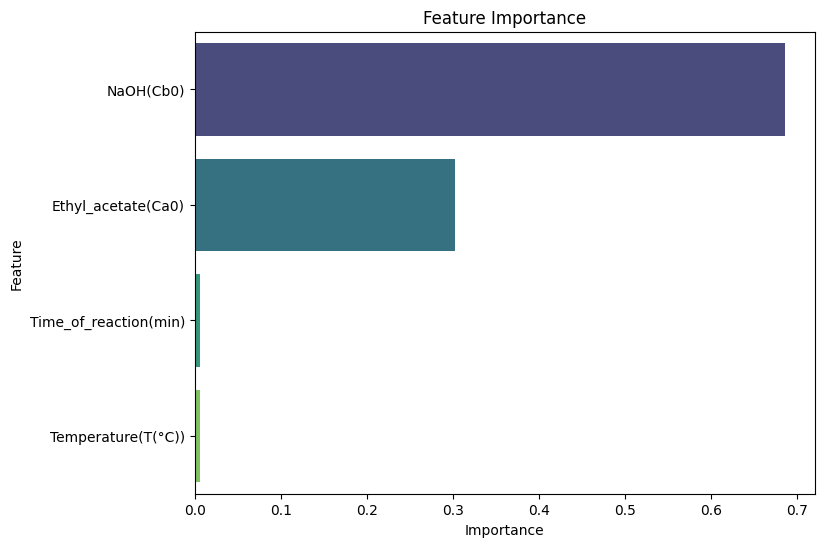

In [25]:
# Plot feature importance for the best model (CatBoost in this case)
plt.figure(figsize=(8, 6))
sns.barplot(x="Importance", y="Feature", data=importance_df, palette="viridis")
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

### 🔧 Optimization Step for Reactor Performance

#### 🎯 Objective:
To optimize the reactor performance by identifying the optimal operating conditions (e.g., temperature, concentrations, and reaction time) that maximize the **conversion rate (`Conversion (X_A)`)**.

---

#### 📝 Steps for Optimization:

1. **Define the Optimization Problem**:
    - **Objective Function**: Maximize `Conversion (X_A)`.
    - **Decision Variables**:
        - `Ethyl_acetate (Ca0)` – Initial concentration of ethyl acetate.
        - `NaOH (Cb0)` – Initial concentration of NaOH.
        - `Temperature (T in °C)` – Operating temperature.
        - `Time_of_reaction (min)` – Reaction time.
    - **Constraints**:
        - All input values must remain within experimentally feasible ranges.

2. **Use the Best Model for Prediction**:
    - Select the **CatBoost Regressor** (`catboost_model`) based on highest R² score and lowest MSE.

3. **Optimization Algorithm**:
    - Apply a global optimization method such as:
        - **Bayesian Optimization**, or
        - **Genetic Algorithm**,
      to efficiently explore the input space.

4. **Implementation**:
    - Define the search space (bounds) for each decision variable.
    - Use the trained `catboost_model` to predict `Conversion (X_A)` across sampled inputs.
    - Determine the input combination that yields the **maximum predicted conversion**.

---

#### 🧠 Code Implementation:
```python
# To be added: Bayesian Optimization or Genetic Algorithm code
# that uses `catboost_model.predict(...)` to evaluate conversion


#### **finding optimize value using bayesianoptimization**

In [26]:
from bayes_opt import BayesianOptimization
import numpy as np
import pandas as pd

# Define the objective function for Bayesian Optimization
def objective_function(Ca0, Cb0, T, time):
    # Prepare the input data for prediction
    input_data = np.array([[Ca0, Cb0, T, time]])
    # Or use DataFrame if your model was trained on DataFrame inputs
    # input_data = pd.DataFrame([[Ca0, Cb0, T, time]], columns=['Ethyl_acetate(Ca0)', 'NaOH(Cb0)', 'Temperature(T(°C))', 'Time_of_reaction(min)'])
    
    # Predict the conversion rate using the CatBoost model
    predicted_conversion = catboost_model.predict(input_data)
    
    # Return as scalar float
    return float(predicted_conversion[0])

# Define the bounds for the decision variables
pbounds = {
    'Ca0': (scaled_df["Ethyl_acetate(Ca0)"].min(), scaled_df["Ethyl_acetate(Ca0)"].max()),
    'Cb0': (scaled_df["NaOH(Cb0)"].min(), scaled_df["NaOH(Cb0)"].max()),
    'T': (scaled_df["Temperature(T(°C))"].min(), scaled_df["Temperature(T(°C))"].max()),
    'time': (scaled_df["Time_of_reaction(min)"].min(), scaled_df["Time_of_reaction(min)"].max())
}

# Initialize the Bayesian Optimizer
optimizer = BayesianOptimization(
    f=objective_function,
    pbounds=pbounds,
    random_state=42
)

# Perform the optimization
optimizer.maximize(
    init_points=10,  # Number of random initial points
    n_iter=50        # Number of iterations for optimization
)

# Extract the optimal conditions
optimal_conditions = optimizer.max['params']
optimal_conversion = optimizer.max['target']

print("Optimal Conditions:")
print(f"Ethyl_acetate(Ca0): {optimal_conditions['Ca0']}")
print(f"NaOH(Cb0): {optimal_conditions['Cb0']}")
print(f"Temperature(T(°C)): {optimal_conditions['T']}")
print(f"Time_of_reaction(min): {optimal_conditions['time']}")
print(f"Maximum Conversion(X_A): {optimal_conversion}")


|   iter    |  target   |    Ca0    |    Cb0    |     T     |   time    |
-------------------------------------------------------------------------
| 1         | 1.001     | -0.3965   | 1.519     | 0.7845    | 0.3782    |
| 2         | 0.8174    | -1.145    | -1.202    | -1.53     | 1.311     |
| 3         | 0.9745    | 0.379     | 0.6879    | -1.659    | 1.673     |
| 4         | 0.3382    | 1.171     | -1.009    | -1.105    | -1.07     |
| 5         | 0.9896    | -0.6372   | 0.0603    | -0.2459   | -0.6943   |
| 6         | 0.3424    | 0.4158    | -1.259    | -0.726    | -0.4322   |
| 7         | 0.9952    | -0.1175   | 0.9519    | -1.044    | 0.08364   |
| 8         | 0.2104    | 0.3492    | -1.577    | 0.3571    | -1.115    |
| 9         | 0.995     | -1.456    | 1.512     | 1.587     | 1.11      |
| 10        | 0.5076    | -0.6359   | -1.402    | 0.6205    | -0.1748   |
| 11        | 0.9989    | -1.62     | 1.508     | -0.4632   | -1.675    |
| 12        | 0.9965    | -1.636    | 

#### **pridicted conversion value per iteration**

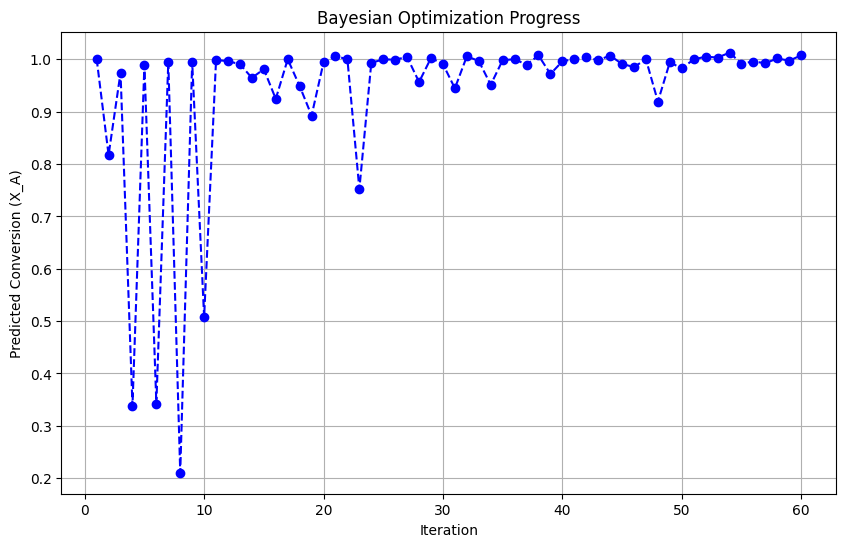

In [27]:
import matplotlib.pyplot as plt

# Get all results from the optimizer
results = optimizer.res

# Extract iterations and target values
iterations = [i + 1 for i in range(len(results))]
conversions = [res['target'] for res in results]

# Plot the progress
plt.figure(figsize=(10, 6))
plt.plot(iterations, conversions, marker='o', linestyle='--', color='b')
plt.xlabel('Iteration')
plt.ylabel('Predicted Conversion (X_A)')
plt.title('Bayesian Optimization Progress')
plt.grid(True)
plt.show()


#### **saving the train model**

In [28]:
import joblib

# Save the trained model
joblib.dump(catboost_model, 'catboost_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']